## Group Project Report


In [2]:
library(ggplot2)
library(tidymodels)
library(tidyverse)
library(repr)
library(janitor)
library(GGally)
library(readr)
library(dplyr)
library(ISLR)
set.seed(1234)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tibble       3.2.1
✔ dplyr        1.1.3     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
── Conflicts ────────

## Introduction

As first-year students seeking an affordable place to stay during the school year, it is important to get some predicted insights on the housing price to have a better overview of the living expenses not just in Vancouver but also in other Canadian cities, and the rental price can be inferred accordingly. Considering this necessity, this study uses two different models, k-Nearest Neighbours (kNN) and linear regression, and aims to discover which model will provide a better prediction of housing prices using the housing listing dataset from the top 45 most populous cities in Canada. 

KNN regression is a local estimator using its neighbourhood,a non-parametric model, and it produces a flexible line based on the distribution of data. Linear regression, on the other hand, is a global estimator that uses the linear relationship between variables and produces a straight line that illustrates the linear relationship between predictors and responses.

## Methods & Results

We first read the data and wrangle it by choosing number of beds and baths greater than 0.

Table 1. Clean dataset with number of beds and baths greater than 0

In [3]:
url <- "https://raw.githubusercontent.com/slappyslop/dsci-100-002-033/main/data/HouseListings-Top45Cities-10292023-kaggle.csv"
download.file(url, "data/HouseListings-Top45Cities-10292023-kaggle.csv")
housing_raw <- read_csv("data/HouseListings-Top45Cities-10292023-kaggle.csv") |> clean_names()
housing_filter <- housing_raw |> filter(number_beds > 0 & number_baths > 0)
housing_clean <- housing_filter |> filter(!(city %in% c("Saskatoon", "Winnipeg", "Nanaimo", "Regina") & province == "Ontario"))
housing_clean

Rows: 35768 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): City, Address, Province
dbl (7): Price, Number_Beds, Number_Baths, Population, Latitude, Longitude, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


city,price,address,number_beds,number_baths,province,population,latitude,longitude,median_family_income
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Toronto,779900,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000
Toronto,799999,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000
Toronto,799900,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000
Toronto,1200000,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000
Toronto,668800,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000
Toronto,669900,#817 -151 DAN LECKIE WAY,2,1,Ontario,5647656,43.7417,-79.3733,97000
Toronto,699000,#1107 -438 KING ST W,2,2,Ontario,5647656,43.7417,-79.3733,97000
Toronto,978000,#2708 -20 EDWARD ST,3,2,Ontario,5647656,43.7417,-79.3733,97000
Toronto,958000,#4616 -386 YONGE ST,2,2,Ontario,5647656,43.7417,-79.3733,97000


Then we split the cleaned dataset into training set and testing set.

In [4]:
housing_split <- initial_split(housing_clean, prop = 0.75, strata = price)
training <- training(housing_split)
testing <- testing(housing_split)

### 1. Linear Regression

We first attempted to make a linear regression of price against one of the variables, we also made our own predictors which included the ratio of beds to bathrooms and sum of beds and bathrooms. In order to see the feasibility of this, we used a pairplot through the following code. Unfortunately, this code makes the kernel crash, and so this was done using RStudio on my (Shravan) local machine

In [5]:
training <- read_csv("data/training_csv")
testing <- read_csv("data/testing.csv")

New names:
• `` -> `...1`
Rows: 27944 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): city, province
dbl (5): ...1, price, number_beds, number_baths, median_family_income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 6987 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): city, province
dbl (5): ...1, price, number_beds, number_baths, median_family_income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
training <- training |> select(-...1, -city, -province)
testing <- testing |> select(-...1, -city, -province)

training_full <- training |> mutate(sum = number_beds + number_baths, ratio = number_beds/number_baths, logprice = log(price))
testing_full <- testing |> mutate(sum = number_beds + number_baths, ratio = number_beds/number_baths, logprice = log(price))

training


price,number_beds,number_baths,median_family_income
<dbl>,<dbl>,<dbl>,<dbl>
438000,2,1,97000
399900,2,1,97000
359000,1,1,97000
415000,2,1,97000
45000,3,5,97000
399000,1,1,97000
449000,1,1,97000
459900,3,2,97000
399900,1,1,97000


## MAKES THE KERNEL CRASH
price_pairplot <- training_full|> 
  ggpairs(
    lower = list(continuous = wrap('points', alpha = 0.4)),
    diag = list(continuous = "barDiag")
  ) +
  theme(text = element_text(size = 20))
"
price_pairplot

We discovered that the correlation coefficient was highest with `sum` and `number_baths` being the best linear predictors of price (0.483 and 0.437). The only other predictor that was non-colinear to `number_baths` was `median_family_income`, howeveer this had a coefficient of 0.065, and so we decided that for the linear regression the only predictor we would use was `number_baths`.

Additionally, we found (after speaking to the instructor during office hours) that we might have better luck predicting log(price) instead. We found that the correlation coefficient of `number_baths` (still the highest) with `logprice` was 0.546. So we took this for our linear regression.

In [7]:
lm_spec <- linear_reg() |> set_engine("lm") |> set_mode("regression")
lm_recipe <- recipe(logprice ~ number_baths, data = training_full)
lm_fit <-  workflow() |> add_recipe(lm_recipe) |> 
                    add_model(lm_spec) |> 
                    fit(data = training_full)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  number_baths  
     12.6853        0.3059  


In [8]:
lm_test_results <- lm_fit |>
  predict(testing_full) |>
  bind_cols(testing_full) |>
  metrics(truth = logprice, estimate = .pred)
lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.6347994
rsq,standard,0.2700901
mae,standard,0.4629664


This approach gives us an RMSE value of `0.6347994`.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


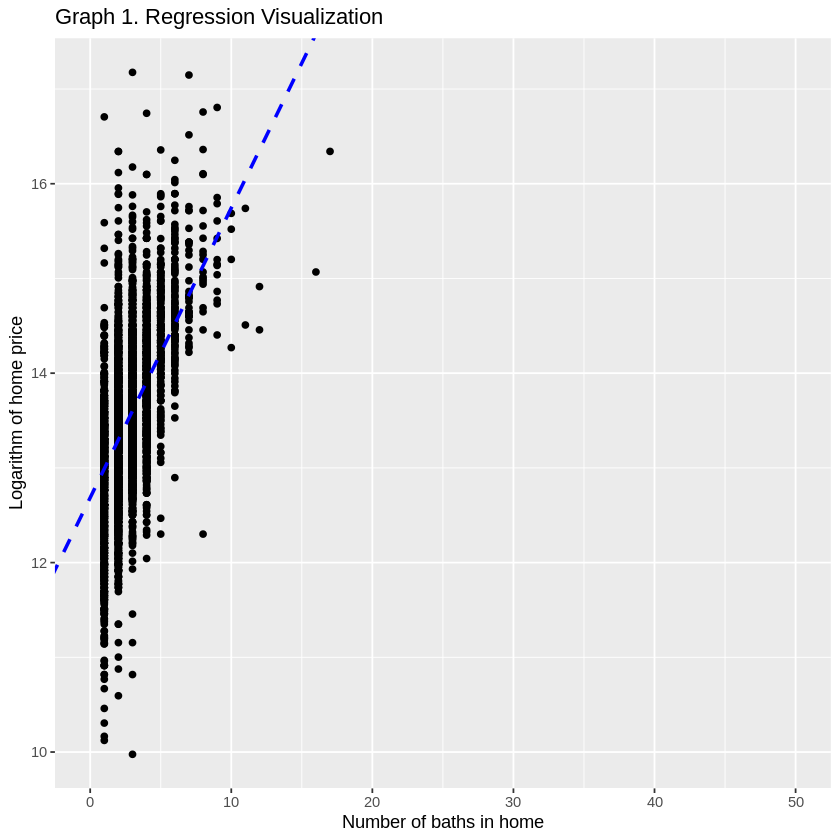

In [12]:
lm_plot <- ggplot(testing_full, aes(x = number_baths , y = logprice)) + 
            geom_point() +xlim(0, 50) + 
            geom_abline(intercept = 12.6853, slope =  0.3059 ,linetype = "dashed", color = "blue", size = 1) +
            labs(y = "Logarithm of home price", x = "Number of baths in home") +
            ggtitle("Graph 1. Regression Visualization")
lm_plot

### 2. KNN  Regression

In [10]:
housing_recipe <- recipe(price ~ median_family_income + number_beds + number_baths, data = training_full) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

housing_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

housing_vfold <- vfold_cv(training_full, v = 5, strata = price)

housing_workflow <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_spec)

housing_workflow

tuned_housing <- housing_workflow |>
  tune_grid(resamples = housing_vfold, grid = tibble(neighbors = seq(from = 1, to = 100, by = 10))) |>
  collect_metrics()|>
  filter(.metric == "rmse")

tuned_housing


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1006173.4,5,24771.90,Preprocessor1_Model01
11,rmse,standard,882676.6,5,24054.50,Preprocessor1_Model02
21,rmse,standard,855858.8,5,24989.09,Preprocessor1_Model03
31,rmse,standard,842449.8,5,25215.11,Preprocessor1_Model04
41,rmse,standard,832996.1,5,24694.76,Preprocessor1_Model05
51,rmse,standard,827822.2,5,25294.90,Preprocessor1_Model06
61,rmse,standard,824169.8,5,25654.59,Preprocessor1_Model07
71,rmse,standard,823502.1,5,25709.96,Preprocessor1_Model08
81,rmse,standard,823402.6,5,25874.52,Preprocessor1_Model09


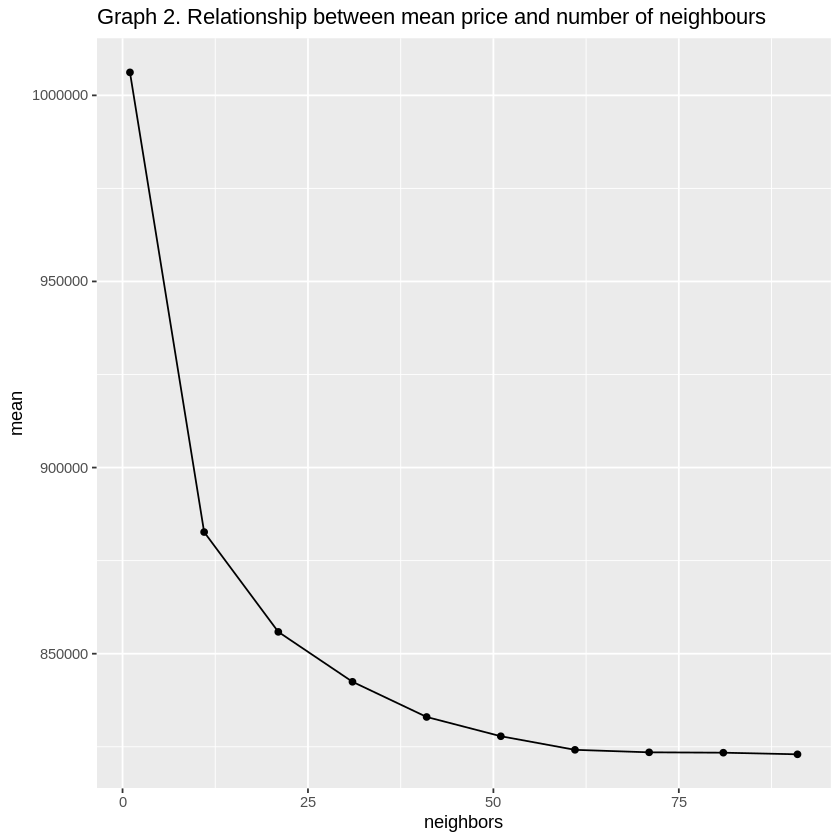

In [13]:
ggplot(tuned_housing, aes(x = neighbors, y = mean)) + geom_point() + geom_line() +
ggtitle("Graph 2. Relationship between mean price and number of neighbours")

We can see a very clear issue here. The way the kNN algorithm works is that it simply finds the city (`median_family_income`), `number_beds` and `number_baths` and takes the average of a number of similar listings based on our value of k. Of course, a 2 bedroom in Vancouver in a downtown skyscraper would have a very different price to a 2 bedroom in East Van. Our dataset does not account for this and this places a large factor in the large errors.

Table 5. K value that gives the smallest RMSE

## Discussion

The results showed that 